## This Jupyter Notebook serves as a demo Workflow of cleaning and exploring IgE measurements with Pax for an allergen panel involve testing blood samples to detect Immunoglobulin E (IgE) antibody levels against specific allergens using the Pax system.

Fill in the empty code cells below. Feel free to add more code cells if needed.

### Data upload:
- Use the upload button on the left to upload the file: 'PAX_Data.xlsx'
- By default the data should have been upload to into the folder '/content'

## Load the required modules
- Just run the following code-cell to load all modules needed for this exercise

In [285]:
import os
import pandas as pd
import numpy as np

### Checking the working directory:
- use 'os.getcwd()' method to check for the current working directory.
- If you are using Google Colab, the default working directory should be the folder 'content'
- If not, use the 'os. chdir(<path>)' method to make sure to set the working directory

In [286]:
os.getcwd()

'/content'

## Read the excel file
- if you are not using Google Colab, make sure to set the path to your data file correctly: \'<FILE-PATH\>/PAX_Data.xlsx'
- use: 'Sheet1' as sheet_name
- ignore the header: header=None
- assign the loaded data to a variable called: df


In [287]:
df = pd.read_excel('PAX_Data.xlsx')

### Print the 'shape' of the dataframe

In [310]:
print(df.shape)

(249, 6616)


[link text](https://)### Print the number of rows:

In [311]:
print("Number of rows:", df.shape[0])

Number of rows: 249


### Use the 'head' method to have a look at the first 10 rows of the table

In [312]:
print(df.head(10))

  Date of test       2023-04-13    2023-04-13.1    2023-04-13.2  \
0  Test number      2334000487D     2331000683D     2331000884D   
1      Country            Spain      Netherland         Germany   
2      Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
3          Sex           Female            Male            Male   
4        Cyn d             18.5           19.67           20.11   
5     rCyn d 1            22.99           21.95           20.66   
6        Dac g            19.15           19.57           21.78   
7        Fes p            21.84            21.3           26.96   
8     rLol p 1            22.33           22.23           22.59   
9        Pas n            21.17           22.28           21.03   

     2023-04-13.3      2023-04-13.4    2023-04-13.5    2023-04-13.6  \
0     2331000880D       2331000851D     2331001025D     2331000881D   
1         Germany        Netherland          Sweden         Germany   
2  7Years 9Months  11Years 11Months  4Years 8Mont

### Splitting the Data:
- As you can see, row 0 to 4 contains the metadata of the experiment
- Row 5 to end contains the measured expression data of Allergens

Now, we need to split the data into:
- Metadata and
- Expression data

Check the documentation of the pandas method 'iloc'
- Split the data, row 0 to 4 and assing it to a variable called: md
- From row 5 to end, assing the expression data to a variable called: expr

In [448]:
md = df.iloc[0:4]
expr = df.iloc[5:]

### Print the 'shape' of each new table

In [449]:
print("Metadata shape:", md.shape)
print("Expression shape:", expr.shape)

Metadata shape: (4, 6616)
Expression shape: (244, 6616)


[link text](https://)### Use the 'head' method to inspect the expr table


In [450]:
print(expr.head(10))

     Date of test 2023-04-13 2023-04-13.1 2023-04-13.2 2023-04-13.3  \
5        rCyn d 1      22.99        21.95        20.66        21.68   
6           Dac g      19.15        19.57        21.78        18.37   
7           Fes p      21.84         21.3        26.96        24.05   
8        rLol p 1      22.33        22.23        22.59        21.99   
9           Pas n      21.17        22.28        21.03        21.77   
10       rPhl p 1      21.77        22.96        21.61        21.55   
11       rPhl p 2      19.92        19.45        21.01        19.59   
12  rPhl p 5.0101      21.79        19.07        20.15        19.72   
13       rPhl p 6      22.25        20.69        23.09        19.94   
14       rPhl p 7      19.85        20.36        18.76         20.3   

   2023-04-13.4 2023-04-13.5 2023-04-13.6 2023-04-13.7 2023-04-13.8  ...  \
5         20.56        21.62        22.83         23.2        25.07  ...   
6         18.12        19.35        19.95        21.52        20.5

As you can see column 0 contains the name of the Allergens

- Set the Allergen names as the index of the table (similar to rownames in R)example:   'expr.index = ...'
- 'drop' the column 0 and override the current variable

In [451]:
expr.index = expr.iloc[:, 0]


In [452]:
expr = expr.drop(columns=expr.columns[0])

### Cleaning the Metadata
- Use 'head' to look into the metadata
Note that we want to use the rows as columns, therefore:
- Transpose the metadata
- Change the table: row 0 should be the column names

In [453]:
print("Metadata_BF_transformation:")
print(md.head())

Metadata_BF_transformation:
  Date of test       2023-04-13    2023-04-13.1    2023-04-13.2  \
0  Test number      2334000487D     2331000683D     2331000884D   
1      Country            Spain      Netherland         Germany   
2      Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
3          Sex           Female            Male            Male   

     2023-04-13.3      2023-04-13.4    2023-04-13.5    2023-04-13.6  \
0     2331000880D       2331000851D     2331001025D     2331000881D   
1         Germany        Netherland          Sweden         Germany   
2  7Years 9Months  11Years 11Months  4Years 8Months  1Years 9Months   
3          Female              Male          Female            Male   

     2023-04-13.7    2023-04-13.8  ...   2023-06-30.97   2023-06-30.98  \
0     2331000879D     2344000227D  ...     2334002233D     2348000664D   
1         Germany              UK  ...        Slovenia          Poland   
2  6Years 9Months  3Years 8Months  ...  8Years 8Months  3Y

In [454]:
md_transposed = md.transpose()

In [455]:
md_transposed.columns = md_transposed.iloc[0]

- Make sure to remove the first row, which now has become the column names

In [456]:
md_transposed = md_transposed.reset_index()
md_transposed = md_transposed.rename(columns={'index': 'Date of test'})

In [457]:
md_transposed = md_transposed[1:].reset_index(drop=True)

In [458]:
print(md_transposed.head())

Date of test  Date of test  Test number     Country           Age Y/M     Sex
0               2023-04-13  2334000487D       Spain   3Years 11Months  Female
1             2023-04-13.1  2331000683D  Netherland    2Years 8Months    Male
2             2023-04-13.2  2331000884D     Germany    2Years 8Months    Male
3             2023-04-13.3  2331000880D     Germany    7Years 9Months  Female
4             2023-04-13.4  2331000851D  Netherland  11Years 11Months    Male


### Use 'head' to inspect your table and make sure it looks as below:

	Date of test Test number	Country	Age Y/M**

1	2023-04-13	2334000487D	Spain	3Years 11Months

2	2023-04-13	2331000683D	Netherland	2Years 8Months

3	2023-04-13	2331000884D	Germany	2Years 8Months

4	2023-04-13	2331000880D	Germany	7Years 9Months

5	2023-04-13	2331000851D	Netherland	11Years 11Months

In [459]:
print("Metadata with new column names:")
print(md_transposed.head())

Metadata with new column names:
Date of test  Date of test  Test number     Country           Age Y/M     Sex
0               2023-04-13  2334000487D       Spain   3Years 11Months  Female
1             2023-04-13.1  2331000683D  Netherland    2Years 8Months    Male
2             2023-04-13.2  2331000884D     Germany    2Years 8Months    Male
3             2023-04-13.3  2331000880D     Germany    7Years 9Months  Female
4             2023-04-13.4  2331000851D  Netherland  11Years 11Months    Male


### Rename the Metadata columns
- rename the columns 'Date of test' to 'Date', 'Test number' to 'TestID' and 'Age Y/M' to 'Age (M)'

In [460]:
md_transposed.rename(columns={
    'Date of test': 'Date',
    'Test number': 'TestID',
    'Age Y/M': 'Age (M)'
}, inplace=True)

### Convert the Age column
The function below converts a string into a number of total month e.g.:

"2Years 8Months" convert to 32.0

- use the below function to convert each 'string' from the Age column into a number (float)
- Hint: check the function '.apply(convert_to_month)' which works on a dataframe column

In [461]:
import re

def convert_to_months(duration_str):
        # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None


    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return float(total_months)


In [462]:
# convert md['Age (M)'] to number
# write your code here:
md_transposed['Age (M)'] = md_transposed['Age (M)'].apply(convert_to_months)






Check the result with 'head'

In [463]:
print("Metadata with converted Age:")
print(md_transposed.head())

Metadata with converted Age:
Date of test          Date       TestID     Country  Age (M)     Sex
0               2023-04-13  2334000487D       Spain     47.0  Female
1             2023-04-13.1  2331000683D  Netherland     32.0    Male
2             2023-04-13.2  2331000884D     Germany     32.0    Male
3             2023-04-13.3  2331000880D     Germany     93.0  Female
4             2023-04-13.4  2331000851D  Netherland    143.0    Male


### Rename the columns of expr
- use the Test Number from md['Test number'] as new column names for the expr data

In [464]:
md.shape

(4, 6616)

In [466]:
expr.shape

(244, 6615)

In [470]:
md_1 = md.drop(columns=md.columns[0])

In [472]:
md_1

,2023-04-13,2023-04-13.1,2023-04-13.2,2023-04-13.3,2023-04-13.4,2023-04-13.5,2023-04-13.6,2023-04-13.7,2023-04-13.8,2023-04-13.9,...,2023-06-30.97,2023-06-30.98,2023-06-30.99,2023-06-30.100,2023-06-30.101,2023-06-30.102,2023-06-30.103,2023-06-30.104,2023-06-30.105,2023-06-30.106
0,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,2334000522D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
1,Spain,Netherland,Germany,Germany,Netherland,Sweden,Germany,Germany,UK,Italy,...,Slovenia,Poland,Belgium,Norway,Netherland,Slovenia,UK,Netherland,UK,Spain
2,3Years 11Months,2Years 8Months,2Years 8Months,7Years 9Months,11Years 11Months,4Years 8Months,1Years 9Months,6Years 9Months,3Years 8Months,3Years 8Months,...,8Years 8Months,3Years 7Months,3Years 7Months,1Years 5Months,1Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months,2Years 5Months
3,Female,Male,Male,Female,Male,Female,Male,Female,Female,Female,...,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male


In [440]:
print(md.iloc[0])

Date of test              Age Y/M
2023-04-13        3Years 11Months
2023-04-13.1       2Years 8Months
2023-04-13.2       2Years 8Months
2023-04-13.3       7Years 9Months
                       ...       
2023-06-30.102     2Years 5Months
2023-06-30.103     2Years 5Months
2023-06-30.104     2Years 5Months
2023-06-30.105     2Years 5Months
2023-06-30.106     2Years 5Months
Name: 2, Length: 6616, dtype: object


In [475]:
expr.columns = md_1.iloc[0]

In [476]:
expr

,2334000487D,2331000683D,2331000884D,2331000880D,2331000851D,2331001025D,2331000881D,2331000879D,2344000227D,2334000522D,...,2334002233D,2348000664D,2331003597D,2331003185D,2331003447D,2334002232D,2344000712D,2331003547D,2344000711D,2334002236D
Date of test,,,,,,,,,,,,,,,,,,,,,
rCyn d 1,22.99,21.95,20.66,21.68,20.56,21.62,22.83,23.2,25.07,22.32,...,23.27,21.77,21.78,20.69,26.49,20.76,21.07,24.48,21.4,20.12
Dac g,19.15,19.57,21.78,18.37,18.12,19.35,19.95,21.52,20.55,19.35,...,19.28,20.33,17.34,19.06,18.86,17.84,18.67,19.99,21.01,17.4
Fes p,21.84,21.3,26.96,24.05,23.21,22.62,21.98,24.55,20.39,22.08,...,21.14,22.39,20.93,21.78,19.95,20.64,20.79,19.24,24.33,20.77
rLol p 1,22.33,22.23,22.59,21.99,23.16,21.27,22.99,23.95,21.35,22.06,...,17.81,19.57,22.76,21.23,21.77,19.41,22.32,20.15,22.7,20.96
Pas n,21.17,22.28,21.03,21.77,20.55,19.32,30.85,23.31,20.62,19.86,...,21.95,22.21,19.55,21.57,18.23,19.71,21.6,20.64,18.91,18.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sola t,22.05,22.33,22.33,21.61,21.85,20.94,19.71,21.27,18.76,18.76,...,20.05,21.44,21.6,18.46,19.28,19.28,20.99,19.42,19.89,18.79
rSola t 2,22.36,24.08,24.08,16.39,16.83,30.73,18.29,19.2,18.89,18.89,...,17.37,19.06,19.1,18.23,16.97,16.97,19.72,19.35,17.84,16.53
rSola t_GBSSI,23.43,24.02,24.02,19.78,20.01,24.56,23.26,21.62,21.01,21.01,...,21.38,20.4,20.35,21.23,20.13,20.13,21.65,21.24,20.97,19.07


### Print the shapes of both tables
- check if the number of columns in expr matches the number of rows in md

In [477]:
print("Shape of metadata (md):", md.shape)
print("Shape of expression (expr):", expr.shape)

Shape of metadata (md): (4, 6616)
Shape of expression (expr): (244, 6615)


### Dropping duplicates and keep='first'

In [479]:
# This function can be use to inspect if there a duplictes within a column
md_transposed['TestID'].duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
6610    False
6611    False
6612     True
6613    False
6614    False
Name: TestID, Length: 6615, dtype: bool

In [481]:
# remove duplicate values in TestID column
# Hint: check the function: 'drop_duplicates'
# Hint: use the parameter 'keep='first'' to keep the first occurance and remove following duplicates

md_unique = md_transposed.drop_duplicates(subset='TestID', keep='first')

Don't forget to drop the duplicates on the expression data as well:

In [484]:
# example:


# df = df.loc[:, ~df.columns.duplicated()]

expr_unique = expr.loc[:, ~expr.columns.duplicated()]
print(expr_unique)

# where df.columns.duplicated(): returns a boolean array of duplicates
# ~ negates the boolean values: True is False and False is True


0             2334000487D 2331000683D 2331000884D 2331000880D 2331000851D  \
Date of test                                                                
rCyn d 1            22.99       21.95       20.66       21.68       20.56   
Dac g               19.15       19.57       21.78       18.37       18.12   
Fes p               21.84        21.3       26.96       24.05       23.21   
rLol p 1            22.33       22.23       22.59       21.99       23.16   
Pas n               21.17       22.28       21.03       21.77       20.55   
...                   ...         ...         ...         ...         ...   
Sola t              22.05       22.33       22.33       21.61       21.85   
rSola t 2           22.36       24.08       24.08       16.39       16.83   
rSola t_GBSSI       23.43       24.02       24.02       19.78       20.01   
rHom s LF           27.51       27.94       27.94       27.75       27.55   
CCD-HSA                27       25.61       25.61       24.08       22.01   

### Print the shapes of both table and make sure the number of rows in md and the number of columns in expr are matching

### Saving the DATA
After initial cleaning, let's save the data in its current form:
- save both tables as csv file in the current directory

In [485]:
md_unique.to_csv('metadata.csv', index=False)

expr_unique.to_csv('expression_data.csv', index=False)


### Subsetting the data
- subset the metadata and expression data to county = 'Spain'

Hint: use the TestID on the filtered data to subset on the expression data

In [495]:
md_spain = md_unique[md_unique['Country'] == 'Spain']

print(md_spain)

test_ids_spain = md_spain['TestID']

test_ids_spain_str = [str(col) for col in test_ids_spain]

expr.columns = expr.columns.astype(str)

expr_spain = expr[test_ids_spain_str]

print(expr_spain)

Date of test            Date       TestID Country  Age (M)     Sex
0                 2023-04-13  2334000487D   Spain     47.0  Female
11             2023-04-13.11  2334000505D   Spain     20.0  Female
15             2023-04-13.15  2334000499D   Spain     44.0  Female
18             2023-04-13.18  2334000473D   Spain     81.0  Female
20             2023-04-13.20  2334000501D   Spain     93.0  Female
...                      ...          ...     ...      ...     ...
6475          2023-06-29.121  2334002191D   Spain     50.0  Female
6490          2023-06-29.136  2334002204D   Spain     70.0    Male
6495          2023-06-29.141  2334002203D   Spain     64.0    Male
6567           2023-06-30.59  2334002235D   Spain    134.0  Female
6614          2023-06-30.106  2334002236D   Spain     29.0    Male

[522 rows x 5 columns]
0             2334000487D 2334000505D 2334000505D 2334000499D 2334000473D  \
Date of test                                                                
rCyn d 1          

- Print the shapes to check the result

In [496]:
print(md_spain.shape)

(522, 5)


# Exploration of the expression data
To gain an initial understanding of the expression data, we need to filter out the noise. Currently, noise is defined as values below 30.

- Convert the expr dataframe into a numpy array
- Set values below 30 to 0.0

Remove rows were all values are 0
- use the 'sum' method (axsis = 1) to the the sums of each row
- use this rowsum values to subset the array

In [497]:
# Convert to numpy
import numpy as np
expr_array = expr.to_numpy()


In [498]:
# Set values below 30 to 0
# Hint:
# 'my_array < value' will return a boolean array which can be used
expr_array[expr_array < 30] = 0.0


In [499]:
# Calculate row sums

row_sums = np.sum(expr_array, axis=1)

# Filter rows where the sum is not 0
expr_array_filtered = expr_array[row_sums > 0]


### Visualize the Expression Data

The follwing code is provided. Just make sure you replace the names of the variables with your variable names.

In [505]:
import seaborn as sns
# import pandas as pd
from sklearn.cluster import KMeans  # Example clustering algorithm
from sklearn.preprocessing import StandardScaler

In [506]:
# Standardize data (optional)
scaler = StandardScaler()
 # use the name of your array
scaled_exp = scaler.fit_transform(expr_array_filtered)

In [508]:
import sys
sys.setrecursionlimit(10000)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


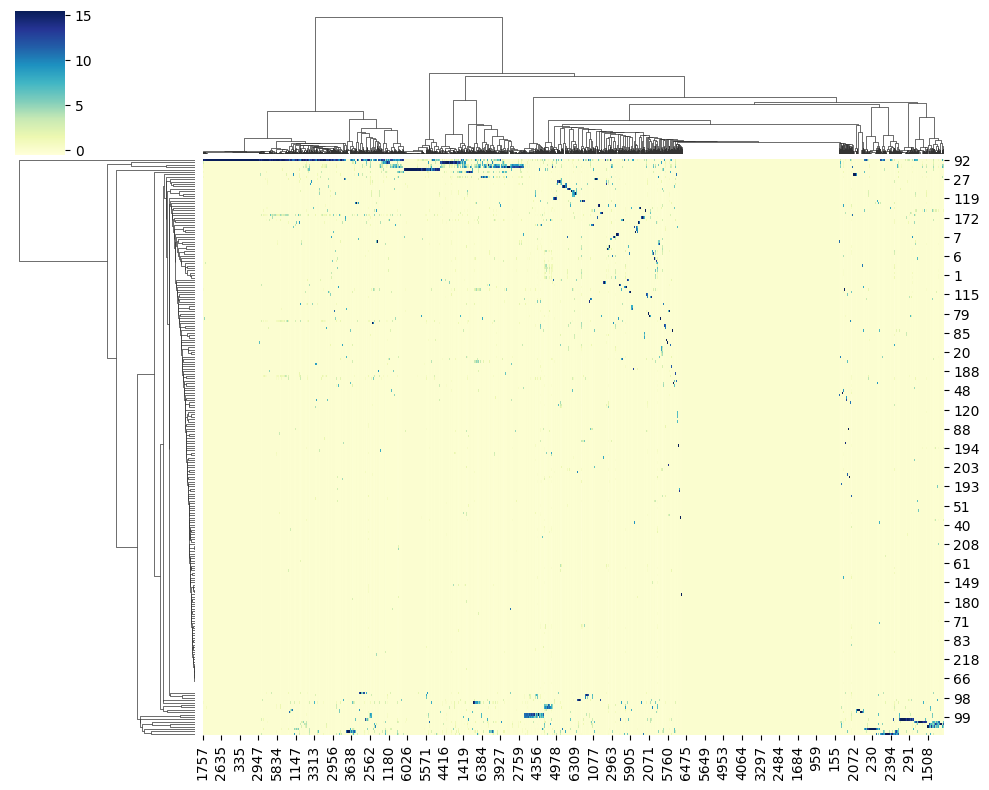

In [509]:
# Create the clustermap with hierarchical clustering
sns.clustermap(scaled_exp,
               method='ward',  # Linkage method (ward, single, complete, average, etc.)
               metric='euclidean',  # Distance metric (euclidean, cityblock, etc.)
               cmap="YlGnBu",       # Colormap
               figsize=(10, 8))    # Figure size

In [503]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Right click the plot and save the heatmap as image

# Done. Congratulations!